# Intuition derrière l'érosion des modèles

La plupart des modèles de machine learning doivent être rafraîchi régulièrement. Quelques intuitions derrière ce phénomène.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Des données très simples.

On simule un jeu de données pour une régression en deux dimensions : $y= \frac{x}{2}+1 + \epsilon$.

In [3]:
from papierstat.datasets import line2d
xy = line2d(100)
xy[:5]

array([[7.9779153 , 4.8650553 ],
       [2.45296688, 1.69489011],
       [5.70750602, 3.47846646],
       [4.81633352, 3.41515132],
       [0.04393984, 0.99115227]])

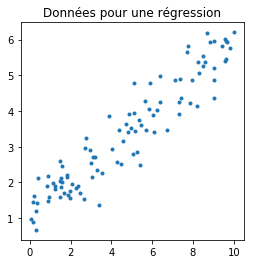

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(xy[:, 0], xy[:, 1], '.')
ax.set_title('Données pour une régression');

## Régression linéaire

C'est le modèle idéal pour ces données.

In [5]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(xy[:, 0:1], xy[:, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

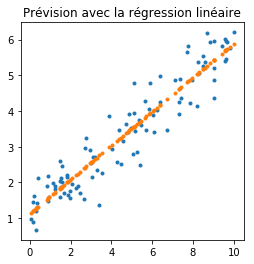

In [6]:
pred = clr.predict(xy[:, 0:1])
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(xy[:, 0], xy[:, 1], '.', label="données")
ax.plot(xy[:, 0], pred, '.', label="prédiction")
ax.set_title('Prévision avec la régression linéaire');

C'est le graphe le plus classique qui soit. Mais on ne se pose jamais la question de ce qu'il se passe en dehors de l'intervalle initial.

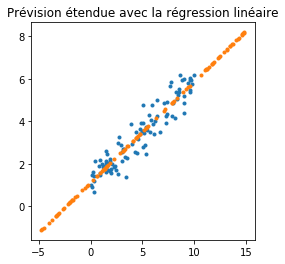

In [7]:
from numpy.random import rand
n = 100
newx = (rand(n) * 20 - 5).reshape(n, 1)
pred = clr.predict(newx)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(xy[:, 0], xy[:, 1], '.', label="données")
ax.plot(newx, pred, '.', label="prédiction")
ax.set_title('Prévision étendue avec la régression linéaire');

Cela paraît plutôt censé de prolonger les prédictions en ce sens. Voyons ce qu'il se passe avec d'autres modèles.

## Autres modèles

In [8]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(xy[:, :1], xy[:, 1])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

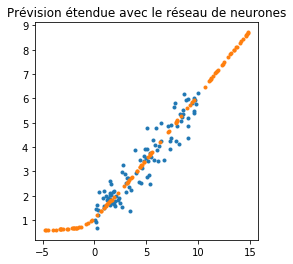

In [9]:
pred = mlp.predict(newx)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(xy[:, 0], xy[:, 1], '.', label="données")
ax.plot(newx, pred, '.', label="prédiction")
ax.set_title('Prévision étendue avec le réseau de neurones');

Essayons avec une autre fonction d'activation.

c:\python365_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


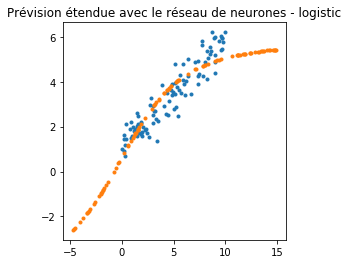

In [10]:
mlp = MLPRegressor(activation='tanh')
mlp.fit(xy[:, :1], xy[:, 1])
pred = mlp.predict(newx)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(xy[:, 0], xy[:, 1], '.', label="données")
ax.plot(newx, pred, '.', label="prédiction")
ax.set_title('Prévision étendue avec le réseau de neurones - logistic');

Si la prédiction est la même dans l'intervalle qui correspond aux données initiales, en dehors de celui-ci la prédiction est complètement différente. Voyons avec un arbre de décision ou une random forest.

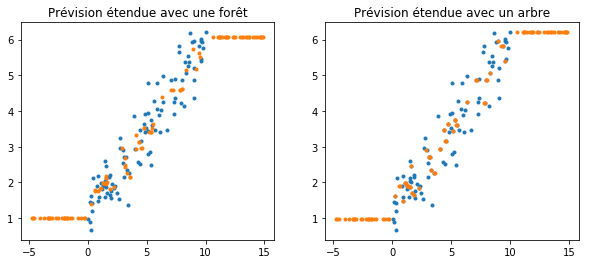

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
rf = RandomForestRegressor()
tr = DecisionTreeRegressor()
rf.fit(xy[:, :1], xy[:, 1])
tr.fit(xy[:, :1], xy[:, 1])

prrf = rf.predict(newx)
trrf = tr.predict(newx)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(xy[:, 0], xy[:, 1], '.', label="données")
ax[1].plot(xy[:, 0], xy[:, 1], '.', label="données")
ax[0].plot(newx, prrf, '.', label="Random Forest")
ax[1].plot(newx, trrf, '.', label="Decision Tree")
ax[0].set_title('Prévision étendue avec une forêt')
ax[1].set_title('Prévision étendue avec un arbre');

## Interprétation

Il faut retenir que ce jeu de données artificiel possède une tendance : il n'est pas stationnaire. C'est le cas de beaucoup de jeu de données liés à l'activité humaine, données web, population... Il est très rare d'avoir un jeu de données stationnaires. Cela veut dire que plus le temps avance, plus les données dérivent. Un modèle est appris à un instant $t$, selon le modèle choisi, il aura plus ou moins de mal à s'adapter à cette dérive. Les modèles non linéaires sont plus performances mais généralisent souvent très mal si les données s'éloignent trop des données utilisées pour apprendre. Il faut donc les réappendre régulièrement pour compenser la perte de performance en prédiction.